In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
tf.enable_eager_execution()  #enable tensorflow api to run the output immediately
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
 

W0803 04:37:44.586624 140356690564992 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
datasets,metadata = tfds.load("fashion_mnist", as_supervised=True, with_info = True)
train_dataset,test_dataset = datasets["train"],datasets["test"]

W0803 04:37:45.096630 140356690564992 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [5]:
num_train_dataset = metadata.splits['train'].num_examples



num_test_dataset = metadata.splits['test'].num_examples

num_train_dataset,num_test_dataset

(60000, 10000)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


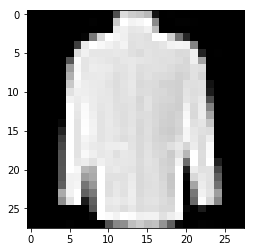

In [8]:
for image,label in train_dataset.take(1):               # take(1) takes one image
  break

image = image.numpy().reshape(28,28)

plt.imshow(image,cmap = "gray")

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding = 'same',activation = tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding= 'same',activation = tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    tf.keras.layers.Conv2D(128,(3,3),padding= 'same',activation = tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])  #increasing layers will increase accuracy to some extent

In [0]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_dataset).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset,epochs = 10,steps_per_epoch = math.ceil(num_train_dataset/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4216 - acc: 0.7805
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2654 - acc: 0.8959
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2180 - acc: 0.9162
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1922 - acc: 0.9269
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1692 - acc: 0.9346
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1423 - acc: 0.9467
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1276 - acc: 0.9495
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1135 - acc: 0.9565
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0960 - acc: 0.9623
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0864 - acc: 0.9677


In [13]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps = math.ceil(num_test_dataset/BATCH_SIZE))

print("Accuracy:{} and loss: {}".format(test_accuracy,test_loss))

313/313 [==============================] - 2s 7ms/step - loss: 0.3011 - acc: 0.9184
Accuracy:0.91839998960495 and loss: 0.3010930132162504


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [15]:
predictions[0]

array([2.2861901e-09, 3.9408426e-13, 1.9774793e-06, 1.0681321e-10,
       2.5123154e-04, 2.4570868e-10, 9.9974674e-01, 2.4166837e-13,
       2.4849084e-13, 1.3330427e-12], dtype=float32)

In [20]:
for i,c in enumerate(predictions):
  print(np.argmax(c),"|| type :{}".format(class_names[np.argmax(c)]))
  
  

6 || type :Shirt
3 || type :Dress
6 || type :Shirt
5 || type :Sandal
2 || type :Pullover
5 || type :Sandal
9 || type :Ankle boot
5 || type :Sandal
6 || type :Shirt
3 || type :Dress
8 || type :Bag
1 || type :Trouser
0 || type :T-shirt/top
3 || type :Dress
5 || type :Sandal
6 || type :Shirt
7 || type :Sneaker
2 || type :Pullover
9 || type :Ankle boot
8 || type :Bag
4 || type :Coat
0 || type :T-shirt/top
8 || type :Bag
1 || type :Trouser
8 || type :Bag
8 || type :Bag
1 || type :Trouser
5 || type :Sandal
7 || type :Sneaker
4 || type :Coat
2 || type :Pullover
4 || type :Coat
